In [335]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import seaborn as sns

data_train = pd.read_csv('/Users/lujiada/Documents/machine_learning/titanic/data/train.csv',engine = 'python',encoding='UTF-8')
data_test  = pd.read_csv('/Users/lujiada/Documents/machine_learning/titanic/data/test.csv',engine = 'python',encoding='UTF-8')
data_train[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [336]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


数据一共有12列，891行。每列的对应信息如下：
>* PassengerId 乘客编号，每位乘客唯一
>* Survived 1为生还，2为不生还
>* Pclass 船舱位等级
>* Name 乘客名字
>* Sex 性别
>* Age 年龄
>* SibSp 堂兄妹的人数
>* Parch 父母或者儿女的人数
>* Ticket 船票号码
>* Fare 票价
>* Cabin 客舱号码
>* Embarked 登船港口

打印出每列的信息发现，有些列的信息并不全，例如Cabin只有204个乘客有信息，其余都是缺失的，稍后要注意对其的处理。

In [337]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe函数打印了一些列的统计信息，比如均值、方差、最大最小值之类。这里只有7列是因为其余5列的类型是object，无法进行数值统计。注意这里的Age字段有些数据是缺失的，在统计的时候并不会包含缺失的数据。
从上边的统计可以看出，PassengerId就是每个乘客的编号，从1到891，这个字段很大几率对我们之后的分析是不起用处的。
根据Survived，成功获救的乘客大约是38%。
根据Pclass，三等舱的乘客最多。
根据Age，乘客平均年龄为29岁，有0岁的婴儿，也有80岁的老人。

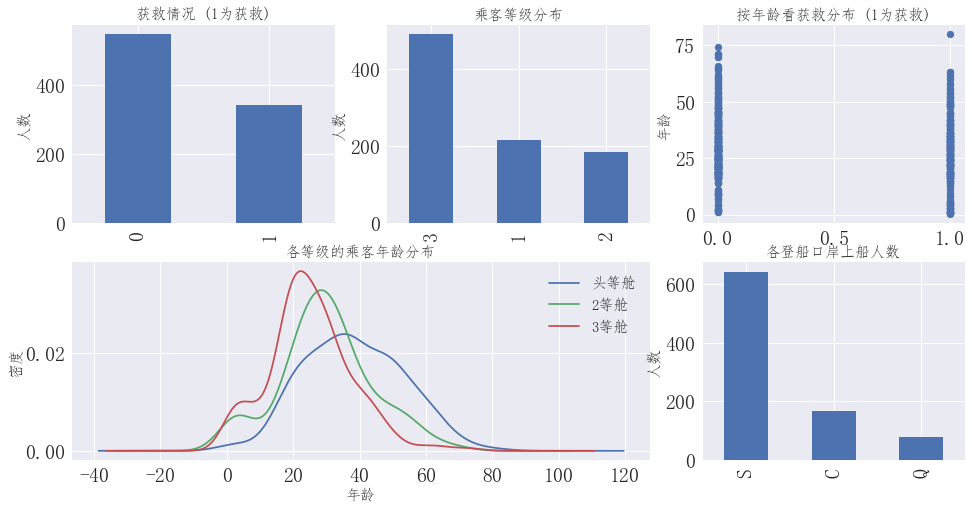

In [338]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
plt.tick_params(labelsize=10)
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
plt.tick_params(labelsize=20)
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)",fontsize=15) # puts a title on our graph
plt.ylabel(u"人数",fontsize=15)  

plt.subplot2grid((2,3),(0,1))
plt.tick_params(labelsize=20)
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数",fontsize=15)
plt.title(u"乘客等级分布",fontsize=15)

plt.subplot2grid((2,3),(0,2))
plt.tick_params(labelsize=20)
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄",fontsize=15)                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)",fontsize=15)


plt.subplot2grid((2,3),(1,0), colspan=2)
plt.tick_params(labelsize=20)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄",fontsize=15)# plots an axis lable
plt.ylabel(u"密度",fontsize=15) 
plt.title(u"各等级的乘客年龄分布",fontsize=15)
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best',fontsize=15) # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
plt.tick_params(labelsize=20)
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数",fontsize=15)
plt.ylabel(u"人数",fontsize=15)  

plt.show()


由以上几张图可以看出，获救的人数大约为三分之一。
一等舱和二等舱的乘客差不多，三等舱乘客最多。
各个年龄段基本上都有获救的人数。
2等和3等舱的乘客基本是年龄40以下的居多，而头等舱乘客分布比较均匀。
绝大多数乘客都在S港口上船

分析了一下各个变量的分布，我们之后看一下各个变量与获救几率的关系

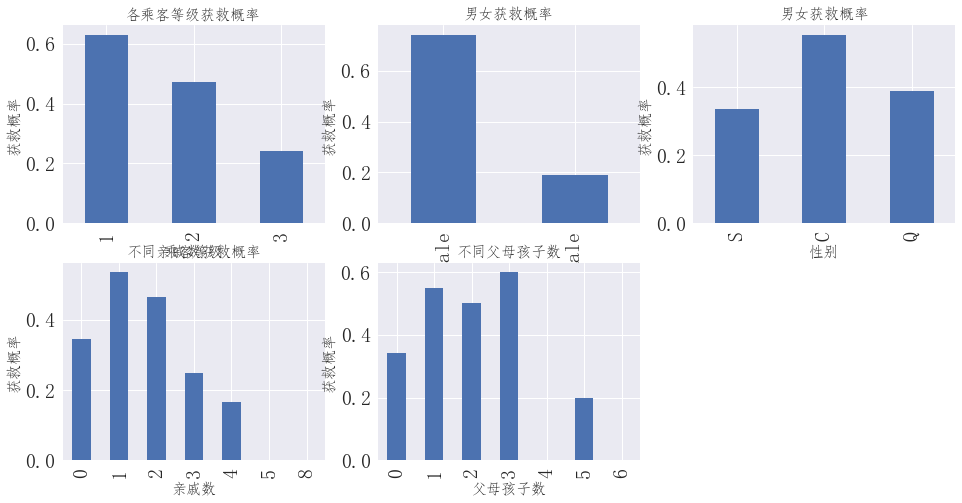

In [339]:
fig = plt.figure()
fig.set(alpha=0.2)
fig = plt.figure(figsize=(16,8))
plt.subplot2grid((2,3),(0,0))

plt.tick_params(labelsize=20)
data_to_plot=data_train.Pclass[data_train.Survived == 1].value_counts()/data_train.Pclass.value_counts()
data_to_plot.plot(kind='bar')
plt.title(u"各乘客等级获救概率",fontsize=15)
plt.xlabel(u"乘客等级",fontsize=15)
plt.ylabel(u"获救概率",fontsize=15)

plt.subplot2grid((2,3),(0,1))
plt.tick_params(labelsize=20)
data_to_plot=data_train.Sex[data_train.Survived == 1].value_counts()/data_train.Sex.value_counts()
data_to_plot.plot(kind='bar')
plt.title(u"男女获救概率",fontsize=15)
plt.xlabel(u"性别",fontsize=15)
plt.ylabel(u"获救概率",fontsize=15)

plt.subplot2grid((2,3),(0,2))
plt.tick_params(labelsize=20)
data_to_plot=data_train.Embarked[data_train.Survived == 1].value_counts()/data_train.Embarked.value_counts()
data_to_plot.plot(kind='bar')
plt.title(u"男女获救概率",fontsize=15)
plt.xlabel(u"性别",fontsize=15)
plt.ylabel(u"获救概率",fontsize=15)

plt.subplot2grid((2,3),(1,0))
plt.tick_params(labelsize=20)
data_to_plot=data_train.SibSp[data_train.Survived == 1].value_counts()/data_train.SibSp.value_counts()
data_to_plot.plot(kind='bar')
plt.title(u"不同亲戚数获救概率",fontsize=15)
plt.xlabel(u"亲戚数",fontsize=15)
plt.ylabel(u"获救概率",fontsize=15)

plt.subplot2grid((2,3),(1,1))
plt.tick_params(labelsize=20)
data_to_plot=data_train.Parch[data_train.Survived == 1].value_counts()/data_train.Parch.value_counts()
data_to_plot.plot(kind='bar')
plt.title(u"不同父母孩子数",fontsize=15)
plt.xlabel(u"父母孩子数",fontsize=15)
plt.ylabel(u"获救概率",fontsize=15)
plt.show()

由几张图可以看出:
>* 舱位等级越高，获救概率越高。
>* 女性的获救概率比男性高。
>* 从C港口登船的乘客获救概率会稍高。
>* 亲戚父母孩子数较少时，乘客获救的几率会较大

之后我们看看存活的情况和年龄的关系。


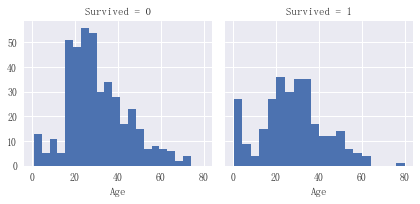

In [340]:
import seaborn as sns
g = sns.FacetGrid(data_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

plt.show()

从图可以看出，儿童(年龄10岁以下)的存活率是比较高的，20-40岁的青壮年的存活率不高。50岁以上的存活率大概为一半左右。
此图纵坐标应该画成存活率比较好，可惜的是对matplotlib和pandas的熟练度不够，未能成功。
从对年龄的分析可以得出以下结论：
>* 年龄的分布对于存活率的影响很大。
>* 年龄的记录并不全，可以想办法补全其空白。
>* 年龄的记录较离散，可以将其分成几大块，有利于模型拟合。

# 数据清洗
接下来我们开始要对数据进行操作了。
首先，Ticket字段看上去是由没什么规律的数字组成的，因此将其去掉应该不会有太大影响。Cabin字段的无效值太多，因此也将其去掉。PassengerId是每位乘客的编号，也对预测没有影响，可以将其去掉

In [341]:
data_train = data_train.drop(["Cabin","Ticket","PassengerId"],axis=1)
data_test = data_test.drop(["Cabin","Ticket","PassengerId"],axis=1)

接下来我们需要将数据中非数字字段转化为数字字段，这样才能够用模型拟合。
需要转化的字段有性别，还有Embarked登船港口，但是Embarked有空白的行，后边还需要针对空白行进行处理，因此我们先转化性别

In [363]:
data_train.loc[data_train['Sex']=='male','Sex']=0
data_test.loc[data_test['Sex']=='male','Sex']=0
data_train.loc[data_train['Sex']=='female','Sex']=1
data_test.loc[data_test['Sex']=='female','Sex']=1

data_train['Sex']=data_train['Sex'].astype(int)
data_test['Sex']=data_test['Sex'].astype(int)
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,1,0,0,2
1,1,1,1,2,3,2,2
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,2
4,0,3,0,2,1,0,1


接下来针对年龄属性，对空白的行进行填充。一般来说，填充的方式有以下几种：
>* 1.以总体数据的均值和方差作为样本，抽取正态分布的随机数。
>* 2.结合其他列的特征来填取中位数(或正态分布随机数)

其中方法1可能会给样本带来噪声，因此选取方法2来填充年龄的空白。


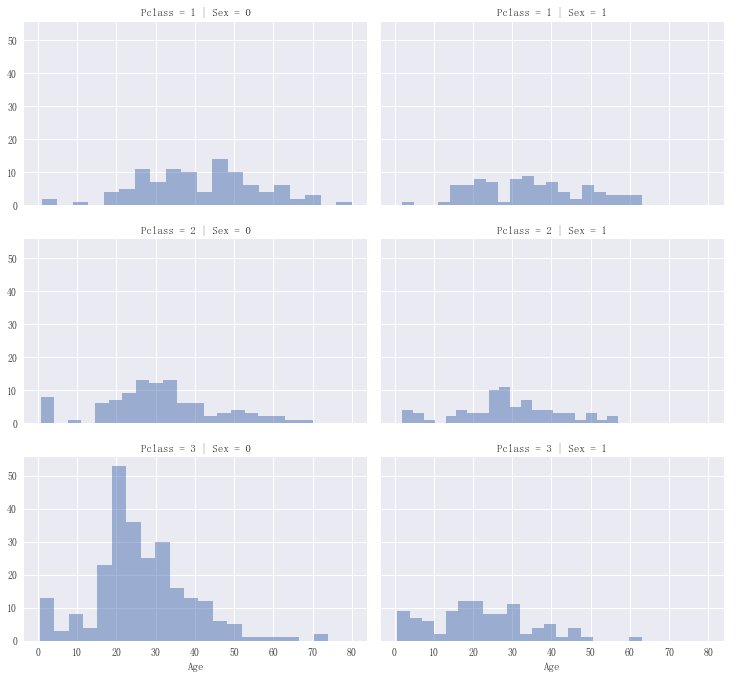

In [343]:
grid = sns.FacetGrid(data_train, row='Pclass', col='Sex', size=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

grid.add_legend(fontsize=5)
plt.show()

上图展示了Pclass和性别与年龄分布的关系，根据分析我们可以认为Pclass和性别与年龄的分布是有相关性的。因此我们将数据按Pclass和Sex分组，将年龄的空白分别填上对应类别的中位数。

In [344]:
combine=[data_train,data_test]
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S


In [345]:
data_train['AgeBand'] = pd.cut(data_train['Age'],5)
data_train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


可以看到不同年龄段对生还率还是有影响的。接下来根据不同年龄段，将离散的年龄值分段合并

In [346]:
for dataset in combine:
    dataset.loc[(dataset['Age']<16),'Age']=0
    dataset.loc[(dataset['Age']>=16)&(dataset['Age']<32),'Age']=1
    dataset.loc[(dataset['Age']>=32)&(dataset['Age']<48),'Age']=2
    dataset.loc[(dataset['Age']>=48)&(dataset['Age']<64),'Age']=3
    dataset.loc[(dataset['Age']>=64),'Age']=4
data_train=data_train.drop(['AgeBand'],axis=1)
combine=[data_train,data_test]
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S


Sibsp字段是亲戚朋友的人数，Parch的父母孩子的人数，因此其实可以创建一个家庭人数family size的字段，是这两者之和，然后可以扔掉Sibsp和Parch的字段。

In [347]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

data_train=data_train.drop(['SibSp','Parch'],axis=1)
data_test=data_test.drop(['SibSp','Parch'],axis=1)

data_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


可以看到，一家四口或一家三口获救的概率是比较高的，但是当家庭的人数过多时，生存概率就会下降

In [348]:
freq_port = data_train.Embarked.dropna().mode()[0]
combine=[data_train,data_test]

for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
data_train[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


Embark字段有两个是空白的，简便起见，可以直接填写出现频率最高的那个港口名字
可以看到，在C港口登船的乘客获救概率比另外两个高

In [349]:

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)
data_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,2,2
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,2
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1


In [350]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null int64
Fare          417 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 22.9+ KB


看到测试集中的Fare字段是有一个空白的，训练集没有空白，方便起见直接在Fare字段中填入中位数即可

In [351]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(),inplace=True)
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand','Survived']].groupby('FareBand',as_index=False).mean().sort_values(by='Survived')

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


将Fare分成数个区间后，可以看到票价越高，乘客的生还概率越高。

In [352]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,FareBand
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,2,"(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,2,2,"(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,1,"(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,2,"(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,"(7.91, 14.454]"


In [353]:
combine=[data_train,data_test]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    
data_train.drop(['FareBand'],axis=1,inplace=True)
data_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1,0,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,2,2
2,1,3,"Heikkinen, Miss. Laina",1,1,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,0,2
4,0,3,"Allen, Mr. William Henry",0,2,1,0,1


In [354]:
data_train.drop(['Name'],axis=1,inplace=True)
data_test.drop(['Name'],axis=1,inplace=True)

In [365]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
Fare          418 non-null int64
Embarked      418 non-null int64
FamilySize    418 non-null int64
dtypes: int64(6)
memory usage: 19.7 KB


将数据集分为训练集和测试集两部分，方便在本地就可以测试数据。

In [380]:
X_train = data_train[201:].drop("Survived",axis=1)
Y_train = data_train[201:]['Survived']
X_test = data_train[0:200].drop("Survived",axis=1)
Y_test = data_train[0:200]['Survived']

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [385]:
logreq = LogisticRegression()
logreq.fit(X_train,Y_train)
acc_log_train = round(logreq.score(X_train,Y_train)*100,2)
acc_log_test = round(logreq.score(X_test,Y_test)*100,2)
print(acc_log_train)
print(acc_log_test)

79.86
77.5


In [400]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc_train = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, Y_test) * 100, 2)
print(acc_svc_train)
print(acc_svc_test)

82.61
84.0


In [387]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, Y_test) * 100, 2)

print(acc_knn_train)
print(acc_knn_test)

85.51
78.5


In [391]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd_train = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd_test = round(sgd.score(X_test, Y_test) * 100, 2)
print(acc_sgd_train)
print(acc_sgd_test)

78.99
72.0


In [398]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree_train)
print(acc_decision_tree_test)

88.26
79.0


In [401]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print(acc_random_forest_train)
print(acc_random_forest_test)

88.26
78.0
